In [2]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/2_OCEN_Different_train_percentage_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/2_OCEN/filter="+str(filter_size)+"/"

# Phase zero: Load and process data

In [10]:
# --------------- load result --------------- #
import collections
pp_text_emb = ["off"]
pp_citation_emb = ["node2vec","n2v"]
diff_percent_result = collections.defaultdict(list)
prevent_repeat_load = []
for text_emb in pp_text_emb:
    for citation_emb in pp_citation_emb:
        curr_embedding_result = collections.defaultdict(list)
        result_filename = "citation="+citation_emb+"_textual="+text_emb+"_threshold="+str(filter_size)+".csv"
        print(text_emb+" "+citation_emb)
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        prevent_repeat_load.append(result_filename)
        # save all percent result in array
        curr_embedding_result["used_train_percent"]=result["used_train_percent"].values
        curr_embedding_result["Name group"]=result["Name group"].values
        curr_embedding_result["LR macro f1"]=result["LR macro f1"].values
        curr_embedding_result["SVM macro f1"]=result["SVM(linear) macro f1"].values
        diff_percent_result[text_emb+" "+citation_emb]=curr_embedding_result
        
print(diff_percent_result)        

off node2vec
off n2v
defaultdict(<class 'list'>, {'off node2vec': defaultdict(<class 'list'>, {'used_train_percent': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3,
       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
       0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
       1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2,
       0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5,
       0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
       0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1,
       0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4,
       0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
       0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ,
       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3,
       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
       0.7, 0.8, 0.

In [11]:
def list_duplicates(seq):
    tally = collections.defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() if len(locs)>1)

In [12]:
from statistics import mean 
# -------------- extract different training size mean f1 score and case when train percentage=1  ------------ #
author_group = []
diff_embedding_mean_result = collections.defaultdict(list)
diff_embedding_all_train_result = collections.defaultdict(list)
for emb_setting, emb_result in diff_percent_result.items():
    print(emb_setting)
    used_train_percent = []
    curr_embedding_mean_result = collections.defaultdict(list)
    curr_embedding_all_train_result = collections.defaultdict(list)
    for key, key_result in emb_result.items():
        # extract train percentage and result index
        if key == "used_train_percent":
            used_train_percent = list(list_duplicates(key_result))
        # extract unqiue author groups
        if key == "Name group":
            author_group = [v for (i,v) in enumerate(key_result) if v not in key_result[0:i]]
        # use index we get to extract result and save it
        for att_key in ["MNB macro F1","LR macro f1","SVM macro f1"]:
            if key == att_key:
                temp = []
                for percentage, idx in used_train_percent:
                    # mean w.r.t different dataset
                    curr_embedding_mean_result[att_key].append(mean(key_result[idx]))
                    # extract result of all datasets for percentage = 1
                    if percentage == 1:
                        curr_embedding_all_train_result[att_key]=key_result[idx]
                    temp.append(percentage)
                curr_embedding_mean_result["train_percent"] = temp
    diff_embedding_mean_result[emb_setting]=curr_embedding_mean_result
    diff_embedding_all_train_result[emb_setting]=curr_embedding_all_train_result
#print(diff_embedding_mean_result)
print(diff_embedding_all_train_result)

off node2vec
off n2v
defaultdict(<class 'list'>, {'off node2vec': defaultdict(<class 'list'>, {'LR macro f1': array([0.87850208, 0.9316343 , 0.97324075, 0.90062422, 0.91581777,
       0.9466704 , 0.95251142, 0.91236264, 0.91053403, 0.96666564,
       0.9376099 , 0.93169914, 0.90448489, 0.93192308, 0.90623423,
       0.93557692, 0.93567608, 0.90333883]), 'SVM macro f1': array([0.84694929, 0.89571529, 0.93815866, 0.87993813, 0.90322295,
       0.95156032, 0.90991992, 0.90086148, 0.88527585, 0.95833301,
       0.92615114, 0.92843927, 0.87229437, 0.89190745, 0.89455521,
       0.93348126, 0.9281114 , 0.88326638])}), 'off n2v': defaultdict(<class 'list'>, {'LR macro f1': array([0.92742591, 0.94415954, 0.99616869, 0.95416155, 0.93696477,
       0.96621418, 0.98180073, 0.93258581, 0.94570071, 0.96386631,
       0.95445239, 0.95969503, 0.95150989, 0.96974359, 0.95019573,
       0.94884648, 0.97228796, 0.95032619]), 'SVM macro f1': array([0.91227119, 0.94811776, 0.9847254 , 0.96168238, 0.936964

# Plot 1: Influence of different training size

In [13]:
clf_methods = ["LR","SVM"]
embedding_methods = ["Node2vec","n2v"]

In [14]:
#-------------- reformate result -------------- #
all_mean_result_clfwise = []
LR_result = []
SVM_result = []
train_percentage = []
for emb_setting, emb_result in diff_embedding_mean_result.items():
    print(emb_setting)
    for key, key_result in emb_result.items():
        if key == "LR macro f1":
            LR_result.append(key_result)
        if key == "SVM macro f1":
            SVM_result.append(key_result)
        if key == "train_percent":
            train_percentage = ['%.1f' % elem for elem in key_result]
    #print(LR_result)
    #print(SVM_result)
print(train_percentage)
all_mean_result_clfwise.append(LR_result)
all_mean_result_clfwise.append(SVM_result)

off node2vec
off n2v
['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']


LR
['Node2vec', 'n2v']
0.9151841894731113
0.9508401506146551


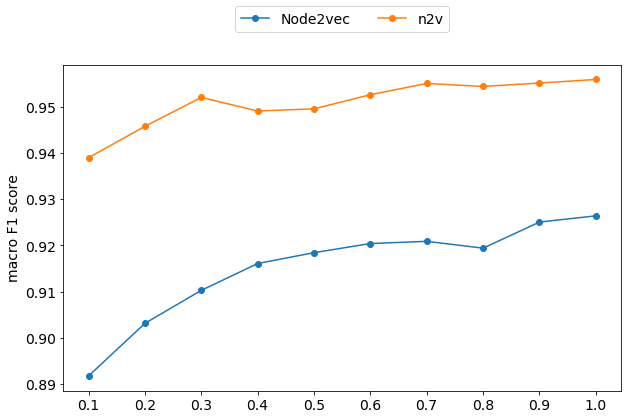

SVM
['Node2vec', 'n2v']
0.888008901664486
0.9427547652544073


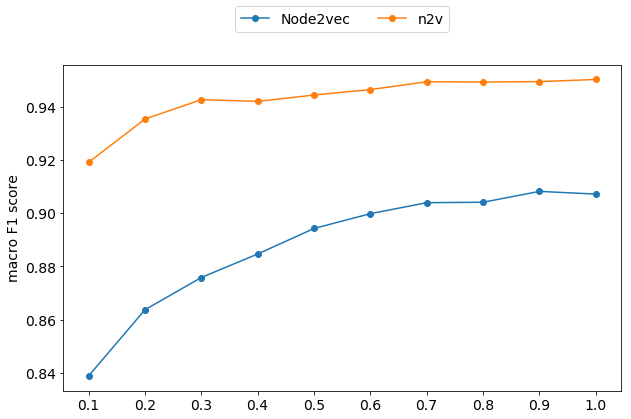

In [21]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (10, 6)

for idx, (result,method) in enumerate(zip(all_mean_result_clfwise,clf_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(train_percentage)), xticklabels=train_percentage)
    print(method)
    print(embedding_methods)
    for emb,emb_label in zip(result, embedding_methods):
        print(np.mean(emb))
        axs.plot(emb, marker='o',label=emb_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        plt.savefig(fname=fig_save_path+"node2vec_vs_n2v_diff_train_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"node2vec_vs_n2v_diff_train_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

# Plot 2: All dataset result w.r.t. different embedding on MNB, LR and SVM

In [17]:
diff_embedding_all_train_result

defaultdict(list,
            {'off n2v': defaultdict(list,
                         {'LR macro f1': array([0.92742591, 0.94415954, 0.99616869, 0.95416155, 0.93696477,
                                 0.96621418, 0.98180073, 0.93258581, 0.94570071, 0.96386631,
                                 0.95445239, 0.95969503, 0.95150989, 0.96974359, 0.95019573,
                                 0.94884648, 0.97228796, 0.95032619]),
                          'SVM macro f1': array([0.91227119, 0.94811776, 0.9847254 , 0.96168238, 0.93696477,
                                 0.96621418, 0.98186403, 0.92442968, 0.93287525, 0.9610919 ,
                                 0.95448382, 0.96654351, 0.93696285, 0.95118443, 0.95410547,
                                 0.93557692, 0.95595001, 0.93797606])}),
             'off node2vec': defaultdict(list,
                         {'LR macro f1': array([0.87850208, 0.9316343 , 0.97324075, 0.90062422, 0.91581777,
                                 0.9466704 , 0.95251

In [18]:
#-------------- reformate result -------------- #
all_result_clfwise = []
LR_result = []
SVM_result = []
for emb_setting, emb_result in diff_embedding_all_train_result.items():
    print(emb_setting)
    for key, key_result in emb_result.items():
        if key == "LR macro f1":
            LR_result.append(key_result)
        if key == "SVM macro f1":
            SVM_result.append(key_result)
    #print(LR_result)
    #print(SVM_result)
all_result_clfwise.append(LR_result)
all_result_clfwise.append(SVM_result)
print(all_result_clfwise)

off node2vec
off n2v
[[array([0.87850208, 0.9316343 , 0.97324075, 0.90062422, 0.91581777,
       0.9466704 , 0.95251142, 0.91236264, 0.91053403, 0.96666564,
       0.9376099 , 0.93169914, 0.90448489, 0.93192308, 0.90623423,
       0.93557692, 0.93567608, 0.90333883]), array([0.92742591, 0.94415954, 0.99616869, 0.95416155, 0.93696477,
       0.96621418, 0.98180073, 0.93258581, 0.94570071, 0.96386631,
       0.95445239, 0.95969503, 0.95150989, 0.96974359, 0.95019573,
       0.94884648, 0.97228796, 0.95032619])], [array([0.84694929, 0.89571529, 0.93815866, 0.87993813, 0.90322295,
       0.95156032, 0.90991992, 0.90086148, 0.88527585, 0.95833301,
       0.92615114, 0.92843927, 0.87229437, 0.89190745, 0.89455521,
       0.93348126, 0.9281114 , 0.88326638]), array([0.91227119, 0.94811776, 0.9847254 , 0.96168238, 0.93696477,
       0.96621418, 0.98186403, 0.92442968, 0.93287525, 0.9610919 ,
       0.95448382, 0.96654351, 0.93696285, 0.95118443, 0.95410547,
       0.93557692, 0.95595001, 0.937

LR
['Node2vec', 'n2v']
0.9263947943506001
0.9558947481805089
test


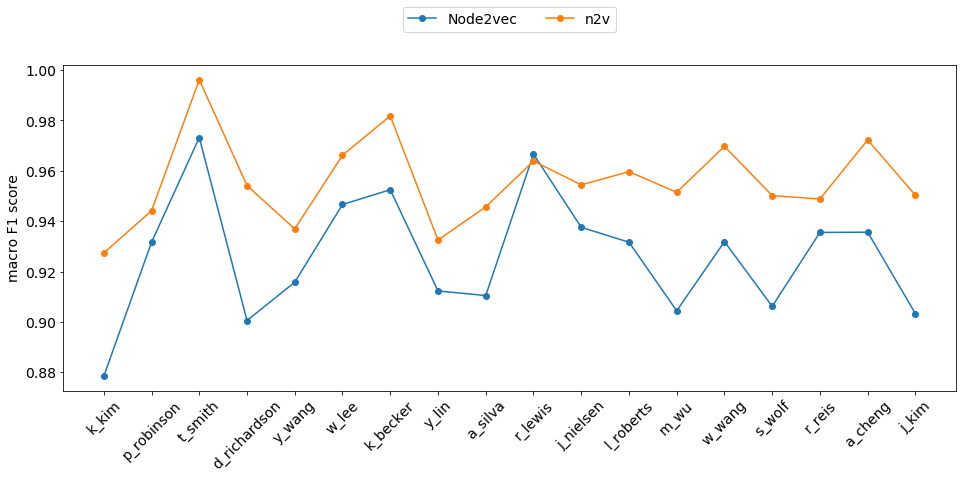

SVM
['Node2vec', 'n2v']
0.9071189661509403
0.9501677565110014
test


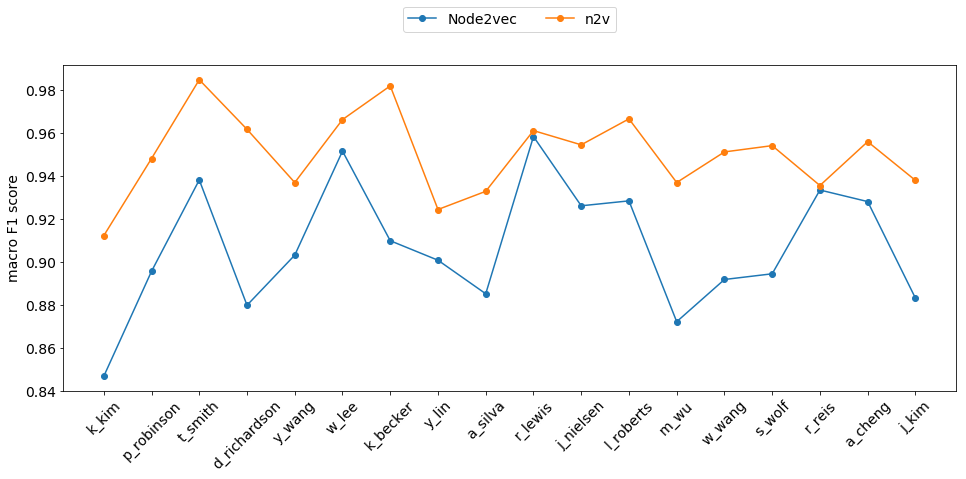

In [22]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (16, 6)

for idx, (result,method) in enumerate(zip(all_result_clfwise,clf_methods)):
    print(method)
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(embedding_methods)
    for emb,emb_label in zip(result, embedding_methods):
        print(np.mean(emb))
        axs.plot(emb, marker='o',label=emb_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        print("test")
        plt.savefig(fname=fig_save_path+"node2vec_vs_n2v_filter="+str(filter_size)+"_"+method+".png",dpi=150,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"node2vec_vs_n2v_filter="+str(filter_size)+"_"+method+".png",dpi=150,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()